# Randomness & the Central Limit Theorem (CLT)
**Goal:** Build intuition for the CLT using sums of dice rolls.

We'll compare:
- **Fair die**: $P(X=k)=1/6$ for $k=1,\dots,6$
- **Biased die (linearly decaying)**: $P(X=k)\propto 7-k$ (1 is most likely, 6 least)

**CLT intuition:** When you add many independent, identically distributed (i.i.d.) random variables with finite variance, the **standardized** sum tends toward a **Normal(0,1)** distribution—regardless of the original distribution's shape.


In [101]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman" # Set font to Times New Roman
from scipy.stats import norm, probplot

rng = np.random.default_rng(42)
plt.rcParams["figure.figsize"] = (7.5, 5)
plt.rcParams["axes.grid"] = True


## 1 Define the dice and verify basic properties
We'll define PMFs, then compute theoretical mean/variance for each die as a sanity check.


In [102]:
# Support (faces) for a six-sided die
faces = np.arange(1, 7)

# Fair die PMF
p_fair = np.full(6, 1/6)

# Linearly decaying biased die: p(k) ∝ 7 - k
weights = 7 - faces  # [6,5,4,3,2,1]
p_biased = weights / weights.sum()

def mean_var(pmf, vals=faces):
    mu = np.sum(vals * pmf)
    var = np.sum((vals - mu)**2 * pmf)
    return mu, var

mu_fair, var_fair = mean_var(p_fair)
mu_biased, var_biased = mean_var(p_biased)

mu_fair, var_fair, mu_biased, var_biased


(np.float64(3.5),
 np.float64(2.9166666666666665),
 np.float64(2.6666666666666665),
 np.float64(2.2222222222222223))

**Expected results (theory):**
- Fair die: $\mathbb{E}[X]=3.5,\quad \mathrm{Var}(X)=\frac{35}{12}\approx 2.9167 $
- Biased die (linearly decaying): we computed numerically above.

We'll also visualize both PMFs.


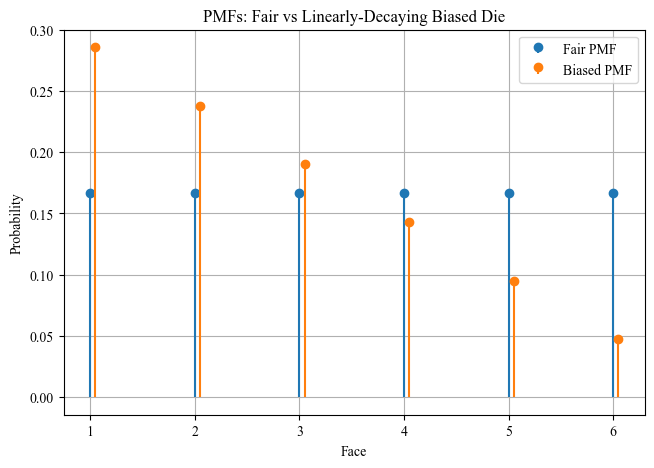

In [103]:
# Plot PMFs
fig, ax = plt.subplots()
ax.stem(faces, p_fair, basefmt=" ", label="Fair PMF")
ax.stem(faces+0.05, p_biased, basefmt=" ", linefmt="C1-", markerfmt="C1o", label="Biased PMF")
ax.set_xticks(faces)
ax.set_xlabel("Face")
ax.set_ylabel("Probability")
ax.set_title("PMFs: Fair vs Linearly-Decaying Biased Die")
ax.legend()
plt.show()


## 2 Simulate sums of $n$ dice
For $n\in\{1,2,5,10,30\}$, we’ll simulate many trials, plot the **distribution of sums**, and overlay a **Normal** with matching mean/variance:
$
S_n = X_1 + \cdots + X_n, \quad \mathbb{E}[S_n] = n\mu,\quad \mathrm{Var}(S_n) = n\sigma^2.
$


In [104]:
def simulate_sums(pmf, n, trials=int(2e5)):
    """Simulate sums S_n for a discrete PMF on faces={1..6}."""
    samples = rng.choice(faces, size=(trials, n), p=pmf)
    return samples.sum(axis=1)

def plot_sum_hist(Sn, mu, var, title):
    # Histogram of sums
    bins = np.arange(Sn.min()-0.5, Sn.max()+1.5, 1)
    plt.hist(Sn, bins=bins, density=True, alpha=0.6, edgecolor="k")
    # Normal overlay with same mean/var
    xs = np.linspace(Sn.min(), Sn.max(), 400)
    plt.plot(xs, norm.pdf(xs, loc=mu, scale=np.sqrt(var)), lw=2)
    plt.title(title)
    plt.xlabel("Sum")
    plt.ylabel("Density")
    plt.show()

ns = [1, 2, 5, 10, 30]


### (a) Fair die: distribution of $S_n$ vs Normal

-Converging to a nomral distribution 

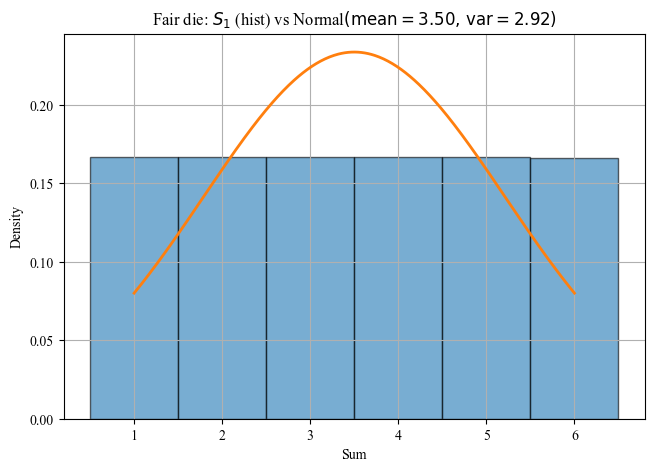

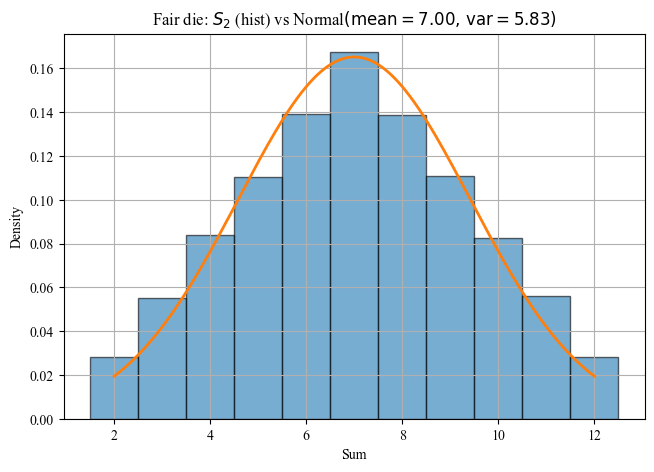

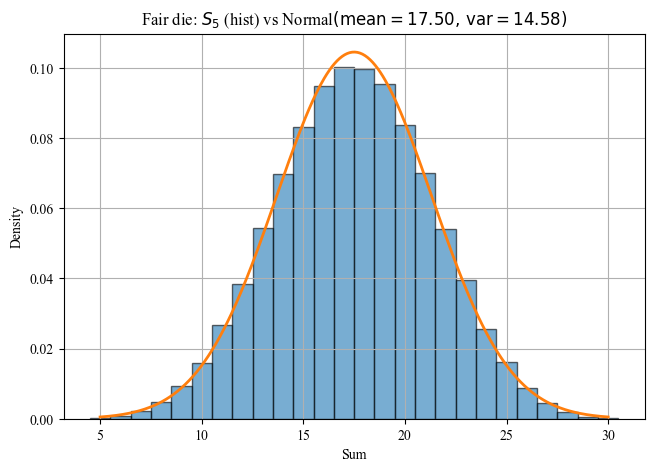

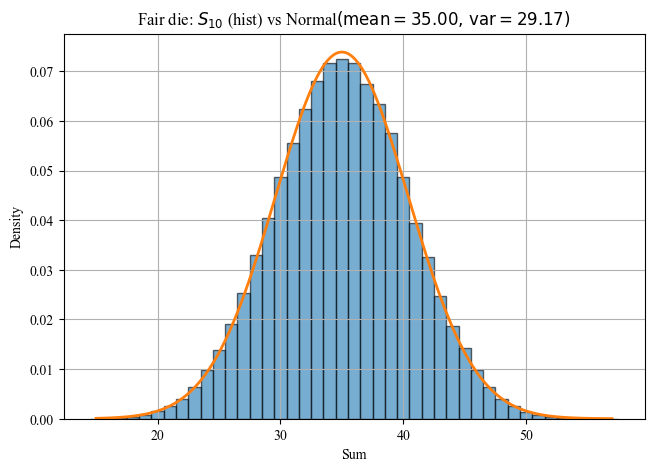

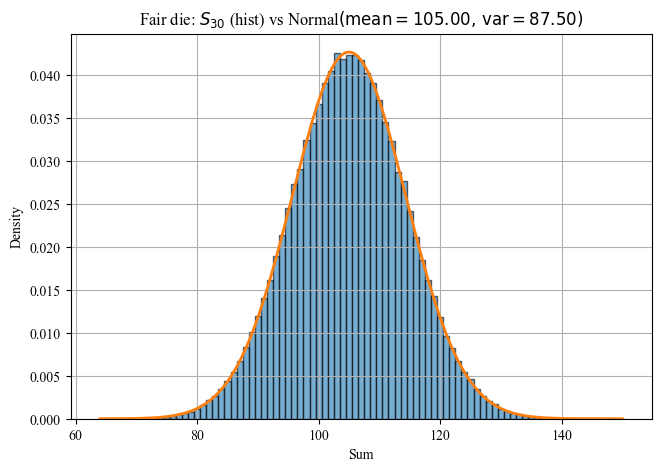

In [115]:
for n in ns:
    Sn = simulate_sums(p_fair, n)
    plot_sum_hist(Sn, mu=n*mu_fair, var=n*var_fair, 
                  title=fr"Fair die: $S_{{{n}}}$ (hist) vs Normal$(\text{{mean}}={n*mu_fair:.2f},\, \text{{var}}={n*var_fair:.2f})$")


### (b) Biased die: distribution of $S_n$ vs Normal
Even though the single-roll distribution is **skewed**, the **sum** looks increasingly Normal as $n$ grows.


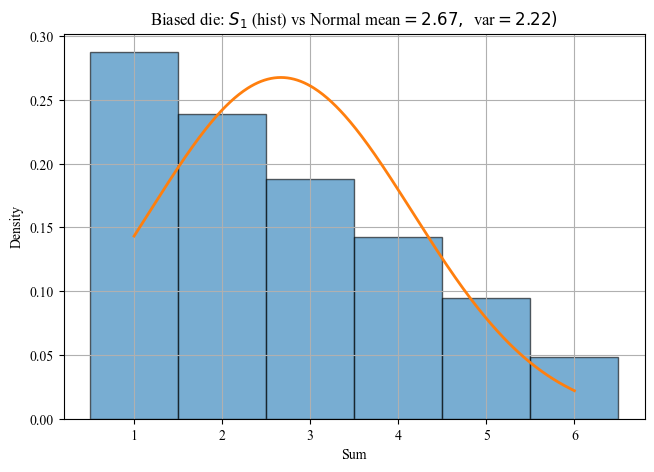

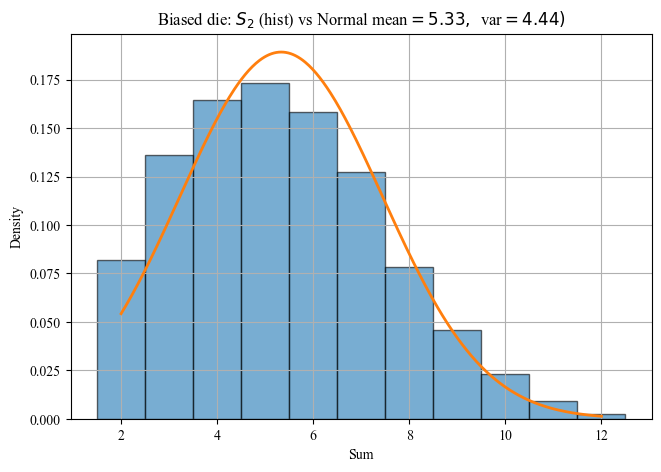

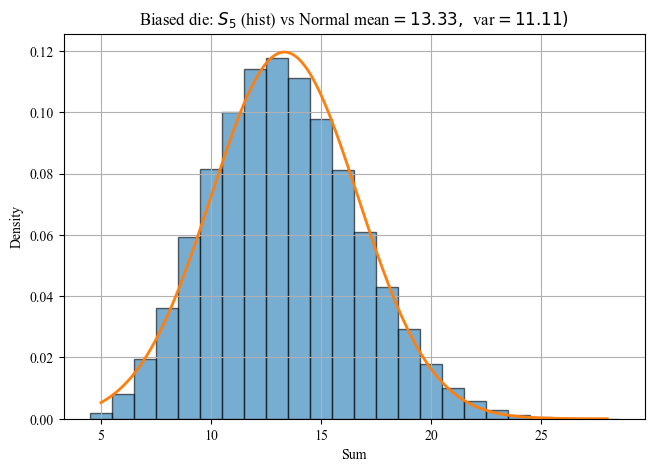

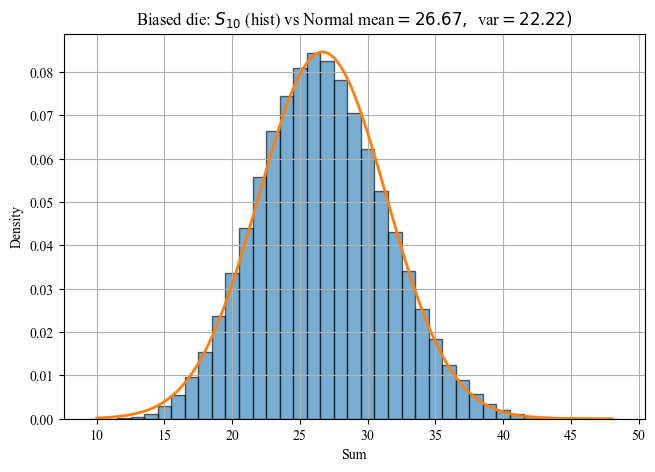

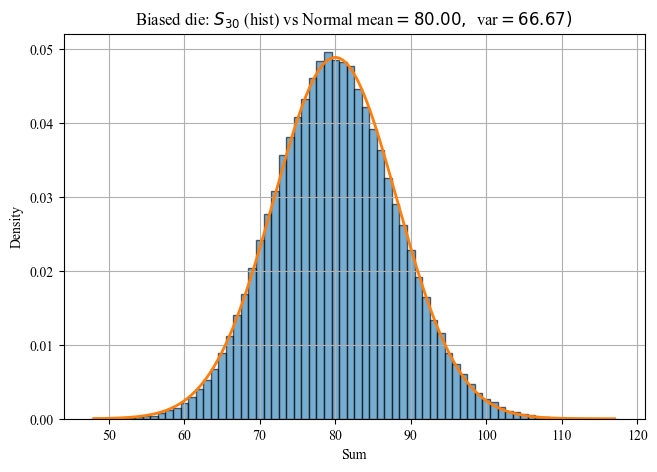

In [114]:
for n in ns:
    Sn = simulate_sums(p_biased, n)
    plot_sum_hist(Sn, mu=n*mu_biased, var=n*var_biased, 
                  title=fr"Biased die: $S_{{{n}}}$ (hist) vs Normal mean$={n*mu_biased:.2f},\,$ var$={n*var_biased:.2f})$")


## Standardization: CLT in action
The CLT talks about **standardized** sums:
$
Z_n \;=\; \frac{S_n - n\mu}{\sqrt{n}\,\sigma} \;\;\xrightarrow{d}\;\; \mathcal{N}(0,1).
$

Now the distribution is has mean of 0 and normalized to 1 

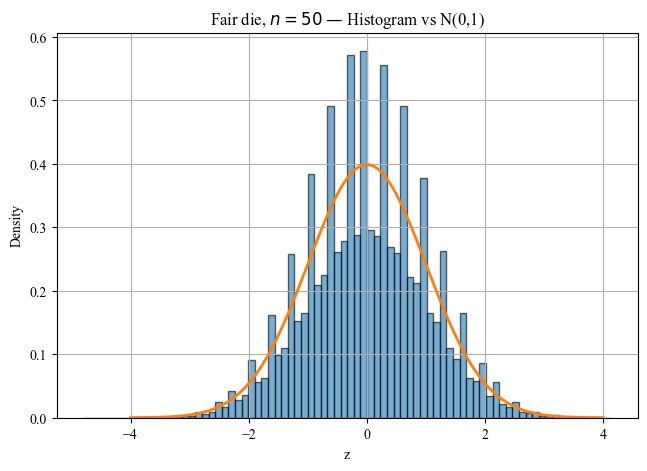

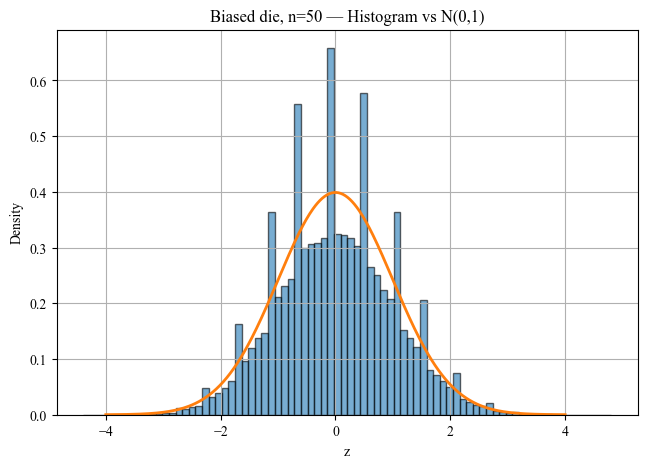

In [107]:
def standardized(Sn, mu, var, n):
    return (Sn - n*mu) / np.sqrt(n*var)

def plot_standardized(Zn, title):
    # Histogram
    plt.hist(Zn, bins=80, density=True, alpha=0.6, edgecolor="k")
    xs = np.linspace(-4, 4, 400)
    plt.plot(xs, norm.pdf(xs), lw=2)
    plt.xlabel("z")
    plt.ylabel("Density")
    plt.title(title + " — Histogram vs N(0,1)")
    plt.show()


# Run for a larger n to make CLT visually crisp
n_large = 50

Sn_fair = simulate_sums(p_fair, n_large)
Zn_fair = standardized(Sn_fair, mu_fair, var_fair, n_large)
plot_standardized(Zn_fair, fr"Fair die, $n={n_large}$")

Sn_biased = simulate_sums(p_biased, n_large)
Zn_biased = standardized(Sn_biased, mu_biased, var_biased, n_large)
plot_standardized(Zn_biased, f"Biased die, n={n_large}")


### (Optional) Exercise prompts
1. Change the biased PMF to something more extreme (e.g., $P(X=1)=0.7$, others equal) and replicate the CLT plots.
2. Replace the die with a **two-point** distribution (e.g., $\pm1$ with unequal probabilities). Observe convergence.
3. Measure how large $n$ must be to pass a simple normality test (e.g., Shapiro–Wilk) at 5% for different PMFs.


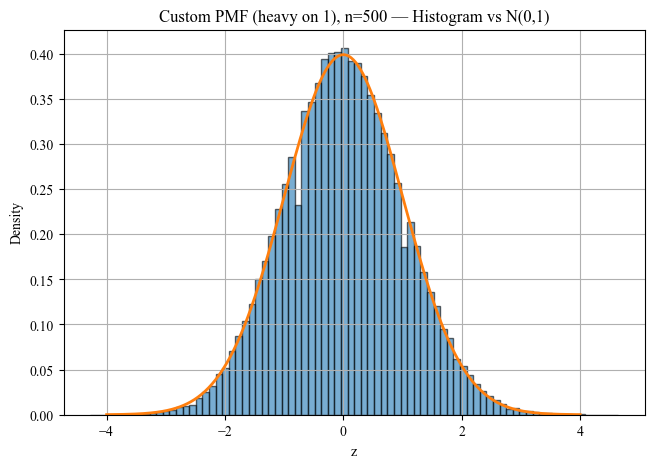

In [108]:
# (Optional) Starter for Exercise 1: custom PMF
p_custom = np.array([0.7, 0.06, 0.06, 0.06, 0.06, 0.06])
p_custom = p_custom / p_custom.sum()

mu_c, var_c = mean_var(p_custom)
n_large = 500
Sn_c = simulate_sums(p_custom, n_large)
Zn_c = (Sn_c - n_large*mu_c) / np.sqrt(n_large*var_c)
plot_standardized(Zn_c, f"Custom PMF (heavy on 1), n={n_large}")


# From CLT to Brownian Motion

The Central Limit Theorem suggests that **aggregates of many small random shocks** look Normal.

- If we let the number of shocks per unit time grow (while each shock shrinks in size),
- We end up with a **continuous-time stochastic process** whose increments are:
  - **Normal** distributed,
  - **Independent** across disjoint time intervals,
  - **Stationary** (distribution depends only on length of interval).

This limiting process is called **Brownian motion** or the **Wiener process**.


## Definition: Standard Brownian Motion $W_t$

A process $\{W_t : t \geq 0\}$ is a Brownian motion if:

1. $W_0 = 0$ (starts at zero).
2. **Independent increments**: For $0 \leq t_1 < t_2 < \dots < t_n$, the increments $W_{t_{k+1}} - W_{t_k}$ are independent.
3. **Normal increments**: $W_{t+s} - W_t \sim \mathcal{N}(0, s)$.
4. **Continuous paths**: $t \mapsto W_t$ is continuous (though *not differentiable*).


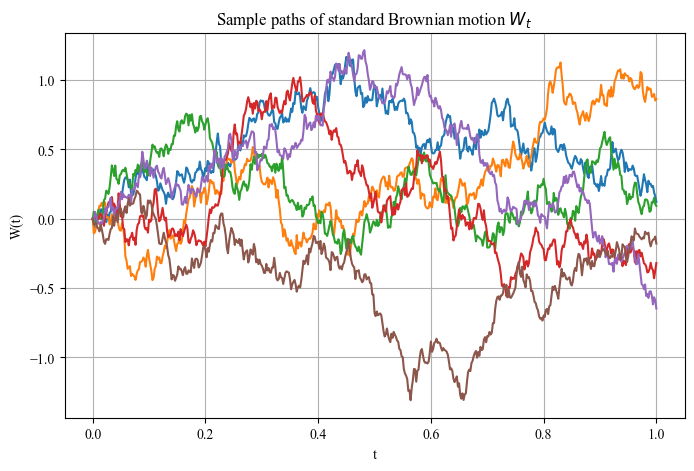

In [109]:
# Simulating Brownian motion sample paths

def brownian_motion(T=1.0, N=500, paths=5, rng_seed=123):
    """
    Simulate standard Brownian motion paths.
    T: final time
    N: number of steps
    paths: number of sample paths
    """
    rng_local = np.random.default_rng(rng_seed)
    dt = T/N
    # increments ~ sqrt(dt)*N(0,1)
    dW = rng_local.normal(loc=0, scale=np.sqrt(dt), size=(paths, N))
    W = np.cumsum(dW, axis=1)
    # prepend W_0=0
    W = np.hstack([np.zeros((paths,1)), W])
    t = np.linspace(0, T, N+1)
    return t, W

t, W = brownian_motion(T=1, N=500, paths=6)

plt.figure(figsize=(8,5))
for i in range(W.shape[0]):
    plt.plot(t, W[i], lw=1.5)
plt.title("Sample paths of standard Brownian motion $W_t$")
plt.xlabel("t")
plt.ylabel("W(t)")
plt.grid(True)
plt.show()


## Connection to CLT

Think of $W_t$ as the *scaling limit* of many tiny independent and identically distributed shocks:

- **In each interval, add a shock $\sim \mathcal{N}(0, t/n)$.**
- **Sum of increments after $n$ steps $\;\to\; \mathcal{N}(0,t)$, by CLT.**
- **In the limit $n \to \infty$, we obtain a continuous-time process with Normal increments: Brownian motion.**

This gives us a rigorous link: *CLT justifies Brownian motion as the right continuous-time model for aggregate randomness*.


# Quadratic Variation of Brownian Motion

**Key idea.** For a process $X_t$, the **quadratic variation** on $[0,t]$ along a partition $\mathcal{P}=\{0=t_0<\dots<t_n=t\}$ is
$$
[X]_t \;=\; \lim_{|\mathcal{P}|\to 0}\;\sum_{k=0}^{n-1} \big(X_{t_{k+1}}-X_{t_k}\big)^2.
$$

For **standard Brownian motion** $W_t$:
- $[W]_t = t \quad \text{(almost surely)}.$
- Paths are continuous but **nowhere differentiable** and have **infinite total variation**.
- For any **$C^1$ (finite-variation)** path $f(t)$, we have $$[f]_t=0.$$

This is the informal mnemonic behind **Itô calculus**:
$$
(dW_t)^2 = dt, \qquad (dt)^2=0,\quad dW_t\,dt=0.
$$

We’ll verify numerically that:
1. The **running quadratic variation** of a simulated $W_t$ tracks $t$.
2. The quadratic variation of a smooth path (e.g., $\sin(2\pi t)$) tends to $0$ as the mesh refines.
3. The **total variation** of Brownian motion blows up with refinement, unlike a smooth curve.


## Running quadratic variation for Brownian motion

For a fixed fine partition, the **running** quadratic variation is the cumulative sum
$$
\sum_{k: t_k \le s} (\Delta W_k)^2,
$$
which should track $s \mapsto s$ for $0 \le s \le T$.


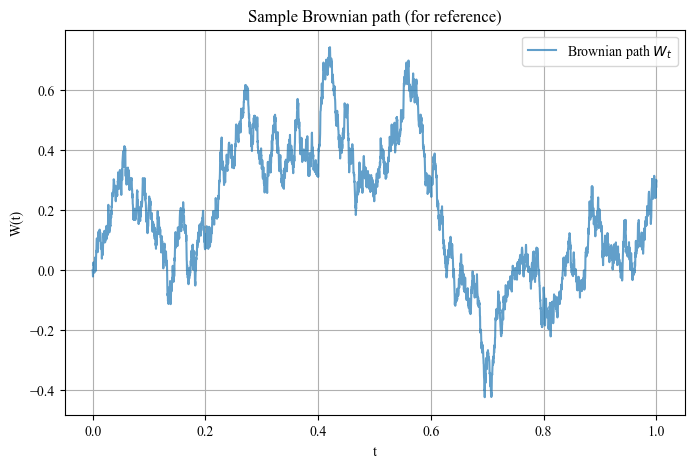

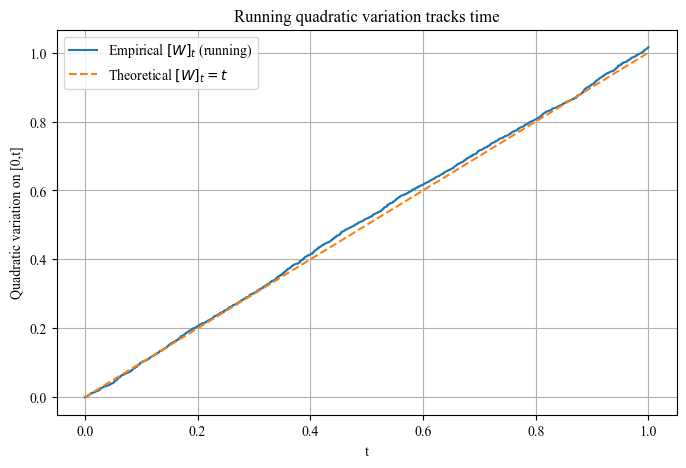

In [120]:

# Reuse the modern RNG pattern
def brownian_motion(T=1.0, N=2000, paths=1, rng_seed=2024):
    rng = np.random.default_rng(rng_seed)
    dt = T / N
    dW = rng.normal(0.0, np.sqrt(dt), size=(paths, N))
    W = np.cumsum(dW, axis=1)
    W = np.hstack([np.zeros((paths, 1)), W])  # include W_0 = 0
    t = np.linspace(0.0, T, N + 1)
    return t, W, dW

# One Brownian path, fine mesh
T = 1.0
N = 4000
t, W, dW = brownian_motion(T=T, N=N, paths=1, rng_seed=123)
W = W[0]
dW = dW[0]
dt = T / N

# Running quadratic variation process (cumulative sum of squared increments)
QV_running = np.cumsum(dW**2)
QV_running = np.hstack([0.0, QV_running])  # align with t

plt.figure(figsize=(8,5))
plt.plot(t, W, alpha=0.7, label="Brownian path $W_t$")
plt.title("Sample Brownian path (for reference)")
plt.xlabel("t"); plt.ylabel("W(t)")
plt.grid(True); plt.legend(); plt.show()

plt.figure(figsize=(8,5))
plt.plot(t, QV_running, label="Empirical $[W]_t$ (running)")
plt.plot(t, t, linestyle="--", label="Theoretical $[W]_t = t$")
plt.title("Running quadratic variation tracks time")
plt.xlabel("t"); plt.ylabel("Quadratic variation on [0,t]")
plt.grid(True); plt.legend(); plt.show()



# Itô’s Lemma 

Suppose a process $X_t$ changes randomly like this:
$$
dX_t = \mu\,dt + \sigma\,dW_t,
$$
where 
- $dt$ is a tiny step in time,
- $dW_t$ is a tiny random shock (from Brownian motion),
- $\mu$ is the average drift,
- $\sigma$ is the volatility.

Now, what if we care not about $X_t$ itself, but about some function of it, say $f(X_t)$?  


**Itô’s Lemma says:**
$$
df(X_t) = f'(X_t)\,dX_t + \tfrac{1}{2} f''(X_t)\,\sigma^2\,dt.
$$

That’s it! It looks like the usual chain rule from calculus, **plus one extra term**:
- The $f'(X_t)\,dX_t$ part is familiar.
- The extra $\tfrac{1}{2} f''(X_t)\sigma^2 dt$ comes from the quadratic variation of Brownian motion: $(dW_t)^2 = dt$.

This “extra term” is the magic of stochastic calculus. It’s why option pricing works out differently from ordinary calculus.


## Itô’s Lemma — simple proof via Taylor expansion

**Setup.** Suppose
$$
dX_t = \mu\,dt + \sigma\,dW_t,
$$
and we look at a smooth function $f(t,x)$. We want the small change in $f$ when both time and $X$ move a tiny bit:
$$
df := f(t+dt,\,X_t + dX_t) - f(t,\,X_t).
$$

### Step 1: Taylor expand to second order
Use the 2-variable Taylor formula around $(t, X_t)$:
$$
df \approx f_t\,dt \;+\; f_x\,dX_t \;+\; \tfrac12 f_{xx}\,(dX_t)^2 \;+\; \underbrace{f_{tx}\,dt\,dX_t + \tfrac12 f_{tt}\,(dt)^2}_{\text{we'll argue these are negligible}}.
$$
All derivatives are evaluated at $(t, X_t)$.

### Step 2: Plug in the SDE increment
Since $dX_t = \mu\,dt + \sigma\,dW_t$,
$$
(dX_t)^2 = (\mu\,dt + \sigma\,dW_t)^2
          = \mu^2 (dt)^2 + 2\mu\sigma\,dt\,dW_t + \sigma^2 (dW_t)^2.
$$

### Step 3: Size (“order”) of tiny pieces
For Brownian motion increments:
- $dW_t$ behaves like a Normal with variance $dt$, so its typical size is $\sqrt{dt}$.
- Hence $(dW_t)^2$ is of order $dt$.
- Products like $dt\cdot dW_t$ are of order $dt^{3/2}$, much smaller than $dt$.
- $(dt)^2$ is even smaller.

**Cheat sheet of sizes:**
- $(dW_t)^2 \sim dt$ ⟶  keep
- $dt\cdot dW_t \sim dt^{3/2}$  ⟶ drop
- $(dt)^2 \sim dt^2$            ⟶ drop

So in $(dX_t)^2$, only the $\sigma^2(dW_t)^2$ term matters at leading order; the others vanish as we refine time.

### Step 4: Keep only the non-negligible terms
Drop anything smaller than order $dt$:
- In the Taylor formula, $f_{tx}\,dt\,dX_t$ and $f_{tt}(dt)^2$ vanish.
- In $(dX_t)^2$, keep only $\sigma^2(dW_t)^2 \approx \sigma^2 dt$.

Therefore,
$$
df \approx f_t\,dt + f_x(\mu\,dt + \sigma\,dW_t) + \tfrac12 f_{xx}\,\sigma^2\,dt.
$$

### Step 5: Collect terms
Group the $dt$ and $dW_t$ parts:
$$
df = \big(f_t + \mu f_x + \tfrac12 \sigma^2 f_{xx}\big)\,dt + \sigma f_x\,dW_t.
$$

That’s **Itô’s Lemma** in differential form.  
The “extra” term $\tfrac12 \sigma^2 f_{xx}\,dt$ is exactly the contribution of the **quadratic variation** of Brownian motion, using the rule $(dW_t)^2 = dt$.

---

### Why was $(dW_t)^2 = dt$ allowed?
Discretely, over a partition $0=t_0<\dots<t_n=t$,
$$
\sum_{k=0}^{n-1} (W_{t_{k+1}} - W_{t_k})^2 \;\to\; t
$$
as the time steps shrink. This is the **quadratic variation** of Brownian motion. In differential shorthand, it’s written as $(dW_t)^2 = dt$, which is what produces the Itô correction.


# Black–Scholes: From Itô to the PDE and closed-form prices

We model the stock price by **Geometric Brownian Motion**:
$$
dS_t = \mu S_t\,dt + \sigma S_t\,dW_t,\quad S_0>0,
$$
where $\mu$ is the drift and $\sigma$ is the volatility.

We consider a European option with value $V(S,t)$ and maturity $T$.

## Itô on $V(S,t)$
Apply Itô’s Lemma to the function $f(t,x)=V(t,x)$ with $x=S_t$:
$$
dV = \Big(V_t + \mu S V_S + \tfrac12 \sigma^2 S^2 V_{SS}\Big)\,dt + \sigma S V_S\,dW_t.
$$

## Delta-hedged portfolio and no-arbitrage
Form a portfolio that holds one option and short $\Delta$ shares:
$$
\Pi = V - \Delta S.
$$
Its differential is
$$
d\Pi = dV - \Delta\,dS.
$$
Choose $\Delta = V_S$ so the $dW_t$ randomness cancels:
$$
d\Pi = \Big(V_t + \tfrac12 \sigma^2 S^2 V_{SS}\Big)\,dt - V_S\,(\mu S\,dt).
$$
Hence
$$
d\Pi = \Big(V_t + \tfrac12 \sigma^2 S^2 V_{SS} - \mu S V_S\Big)\,dt.
$$
The hedged portfolio is (instantaneously) **riskless**, so it must earn the **risk-free rate** $r$:
$$
d\Pi = r\,(V - S V_S)\,dt.
$$
Equate the drifts and rearrange to the **Black–Scholes PDE**:
$$
\boxed{\,V_t + \tfrac12 \sigma^2 S^2 V_{SS} + r S V_S - r V = 0\,}.
$$

**Boundary/example payoff:** For a European call with strike $K$ and maturity $T$,
$$
V(S,T) = \max(S-K,0).
$$

## Solution for European call/put
Under the risk-neutral measure (replace $\mu$ by $r$), the solution is
$$
C = S\,\Phi(d_1) - K e^{-r\tau}\,\Phi(d_2), \qquad
P = K e^{-r\tau}\,\Phi(-d_2) - S\,\Phi(-d_1),
$$
with $\tau = T-t$ and
$$
d_1 = \frac{\ln(S/K) + (r+\tfrac12\sigma^2)\tau}{\sigma\sqrt{\tau}},\qquad
d_2 = d_1 - \sigma\sqrt{\tau}.
$$

Here $\Phi$ is the standard normal CDF.
